In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

In [2]:
from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


# D+ -> Ks K+

In [55]:
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_Kspip_tight_v2_240420/topo/resultfile/result_Ks_K/*.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'Dp_M>0'

tree = 'Ks_K'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_chiProb','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Kp_charge','Kp_mcPDG','Ks_K_rank','Kp_genMotherPDG',\
             'Ks_genMotherPDG','Ks_isSignal',\
             'iCascDcyBrP_Dp_0','iCascDcyBrP_Dsp_0','iCascDcyBrCcP_Dp_0','iCascDcyBrCcP_Dsp_0']


In [56]:
pd_df_v0 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

In [57]:
# cut = "etapip_pipipi_rank==1 & Dp_chiProb>0.01"
cut = "Ks_K_rank==1"

# cut = "Dp_M>0"

pd_df_test=pd_df_v0.query(cut)

# pd_df_test=pd_df_test.query("etapip_pipipi_rank==1")

pd_df_test

,__experiment__,__run__,__event__,Dp_M,Dp_chiProb,Dp_isSignal,Dp_CMS_p,Dp_cosAngleBetweenMomentumAndVertexVector,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Dp_acos_cosAngleBetweenMomentumAndVertexVector,...,Kp_charge,Kp_mcPDG,Ks_K_rank,Kp_genMotherPDG,Ks_genMotherPDG,Ks_isSignal,iCascDcyBrP_Dp_0,iCascDcyBrP_Dsp_0,iCascDcyBrCcP_Dp_0,iCascDcyBrCcP_Dsp_0
0,1003,0,39598046,1.964421,0.597137,0.0,2.618916,0.983622,1.000000,0.181232,...,1.0,321.0,1.0,431.0,431.0,1.0,-1,0,-1,-1
1,1003,0,39598683,2.087970,0.843600,0.0,3.018885,0.544368,1.000000,0.995161,...,1.0,211.0,1.0,421.0,421.0,1.0,-1,-1,-1,-1
2,1003,0,39600047,1.864510,0.929852,1.0,2.829828,0.998085,0.999991,0.061891,...,-1.0,-321.0,1.0,-411.0,-411.0,1.0,-1,-1,0,-1
3,1003,0,39603859,1.753954,0.932768,0.0,2.970724,0.316139,0.998931,1.249139,...,1.0,321.0,1.0,323.0,-311.0,1.0,-1,1,-1,-1
4,1003,0,39604349,1.971790,0.652296,0.0,2.680012,0.872893,0.999290,0.509696,...,-1.0,-321.0,1.0,-431.0,-431.0,1.0,-1,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583050,1003,0,172496992,1.668624,0.442211,0.0,3.861237,-0.883077,0.999864,2.653177,...,1.0,321.0,1.0,-421.0,-311.0,1.0,-1,-1,-1,-1
1583051,1003,0,172498900,1.659404,0.002987,0.0,4.075648,0.998623,1.000000,0.052493,...,1.0,321.0,1.0,-421.0,-311.0,1.0,-1,-1,-1,-1
1583052,1003,0,172499001,1.794030,0.661872,0.0,3.148312,-0.538357,0.999976,2.139283,...,1.0,321.0,1.0,-421.0,0.0,0.0,27,-1,-1,-1
1583053,1003,0,172499273,1.963859,0.073415,0.0,3.729782,0.133810,0.999340,1.436584,...,1.0,321.0,1.0,431.0,431.0,1.0,-1,0,-1,-1


1557502


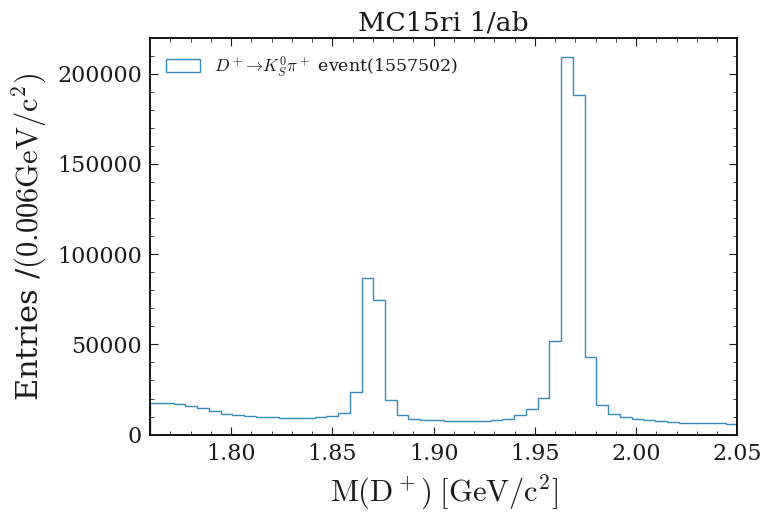

In [58]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.76,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper left",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

772980


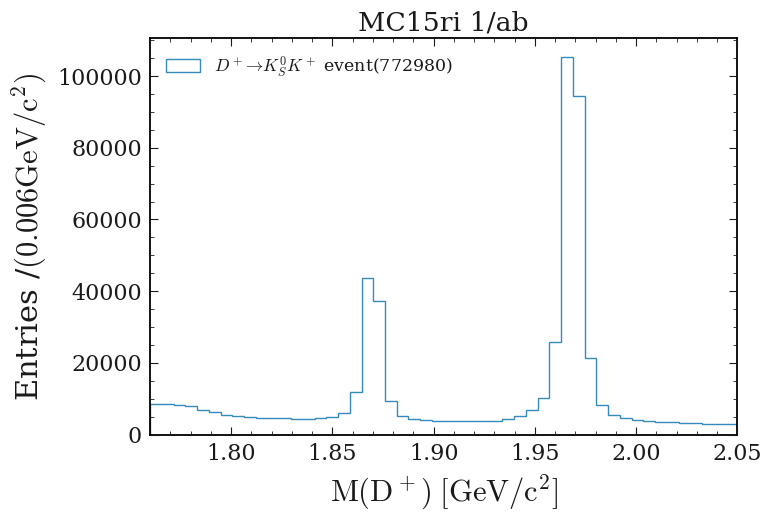

In [59]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.76,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test.query('Kp_charge==1')
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 K^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper left",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

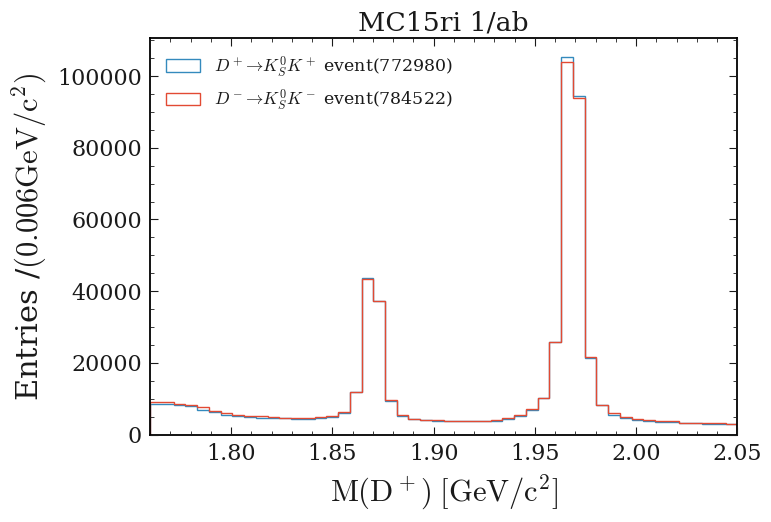

In [60]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.76,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test.query('Kp_charge==1')
df2 = pd_df_test.query('Kp_charge==-1')

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 K^+$ event(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^- \to K_S^0 K^-$ event(' + str(N_df2) +')');

plt.legend(loc="upper left",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M_compare_cc.png"
# plt.savefig(file1_name)
# print(len(df))

772980


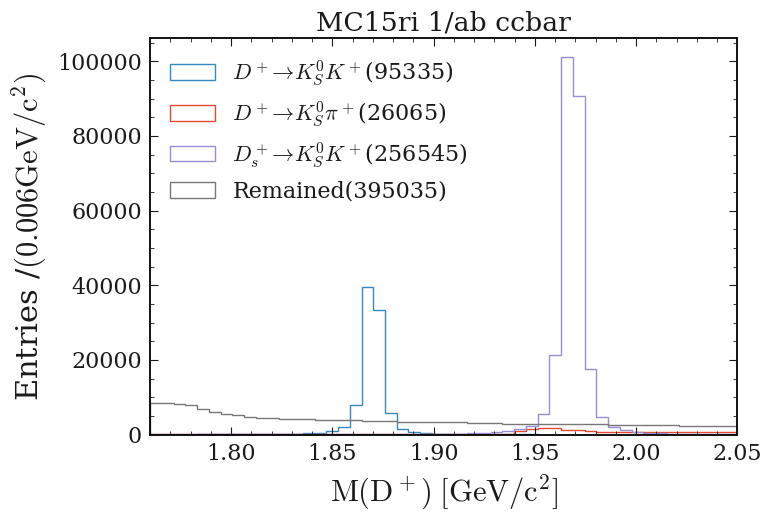

In [61]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.76,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Kp_charge==1 & iCascDcyBrP_Dp_0==0"
cut2 = "Kp_charge==1 & iCascDcyBrP_Dp_0==16"
cut3 = "Kp_charge==1 & iCascDcyBrP_Dsp_0==0"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Kp_charge==1 & \
                iCascDcyBrP_Dp_0!=0 & \
                iCascDcyBrP_Dp_0!=16 & \
                iCascDcyBrP_Dsp_0!=0 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 K^+$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to K_S^0 K^+$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

784522


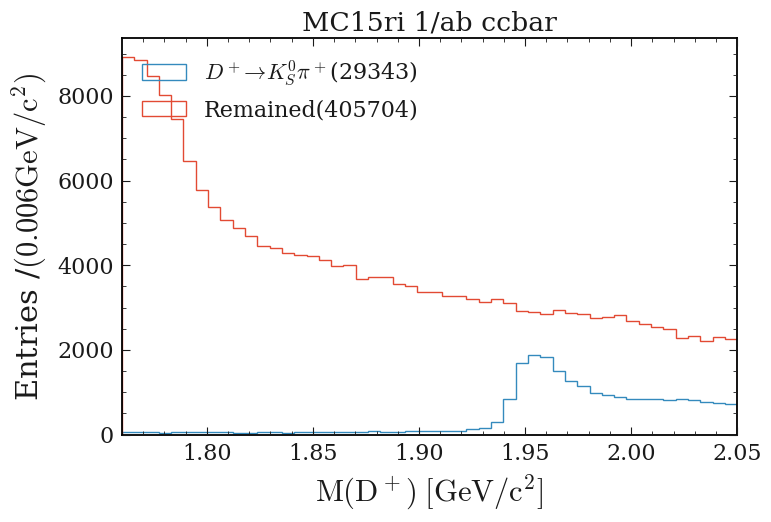

In [62]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.76,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==0"
cut2 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==16"
cut3 = "Kp_charge==-1 & iCascDcyBrCcP_Dsp_0==0"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Kp_charge==-1 & \
                iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrCcP_Dp_0!=16 & \
                iCascDcyBrCcP_Dsp_0!=0 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

# plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 K^+$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 \pi^+$(' + str(N_df2) +')');
# plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to K_S^0 K^+$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

555136


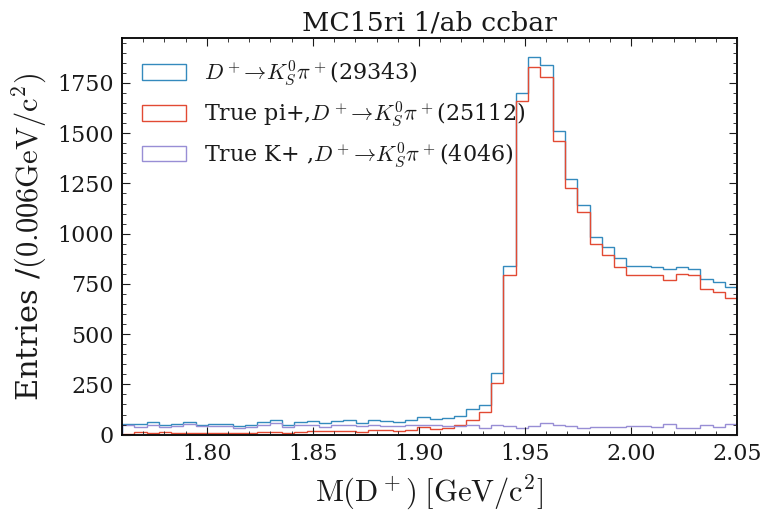

In [70]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.76,2.05,51)

xm = np.linspace(*xrange)

cut1 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==0"
cut2 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==16 "
cut3 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==16 & abs(Kp_mcPDG)==211"
# cut4 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==16 & abs(Ks_genMotherPDG)==411"
cut4 = "Kp_charge==-1 & iCascDcyBrCcP_Dp_0==16 & abs(Kp_mcPDG)==321"

# cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0)  & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
# cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
# cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "Kp_charge==-1 & \
                iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrCcP_Dp_0!=16 & \
                iCascDcyBrCcP_Dsp_0!=0 "
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df4 = pd_df_test.query(cut4)

df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df4 = len(df4 )

N_df_rest = len(df_rest)

# plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 K^+$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to K_S^0 \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'True pi+,$D^+ \to K_S^0 \pi^+$(' + str(N_df3) +')');
plt.hist(df4["Dp_M"],bins=xm,histtype='step',label=r'True K+ ,$D^+ \to K_S^0 \pi^+$(' + str(N_df4) +')');

# plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi/topo/MC15ri_etaetapip_tight_v2_Dp_M.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)